In [1]:
import numpy as np
import pandas as pd
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.model_selection import train_test_split
from keras.layers.convolutional import Convolution2D
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.optimizers import Adam
from keras.layers.convolutional import Convolution2D
from keras.utils import np_utils

from matplotlib import pyplot as plt
# %matplotlib inline
import glob

Using TensorFlow backend.


In [2]:
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
nb_epoch = 1 # Change to 100

batch_size = 128
img_rows, img_cols, img_channel = 210, 280, 3

In [3]:
# get validation images
images_validation = pd.read_csv("data/capture_inferno_validation.csv")

In [4]:
images_validation.columns = ['index', 'steer', 'gear', 'accel', 'brake', 'clutch', 'speed']

In [5]:
images_validation = images_validation[['index','speed']]

In [6]:
images_validation = images_validation[47:]

In [7]:
images_validation['index'] = images_validation['index'].apply(lambda x: str(x) + '.png',0)

In [8]:
images_validation.head()

,index,speed
47,1479699965366.png,0.000050
48,1479699965394.png,0.000050
49,1479699965420.png,0.000535
50,1479699965445.png,0.000739
51,1479699965471.png,0.142834


In [9]:
image_dict = []
for filename in glob.glob('data/images_validation/*.png'): #assuming gif
    img = cv2.imread(filename)
    img = cv2.resize(img, (100, 66))
    image_dict.append({'index': filename.split('/')[-1], 'raw': img})

In [11]:
# count = 5
# for image in image_dic.values():
#     plt.figure()
#     plt.imshow(image)

In [12]:
image_dict[1]['raw'].shape

(66, 100, 3)

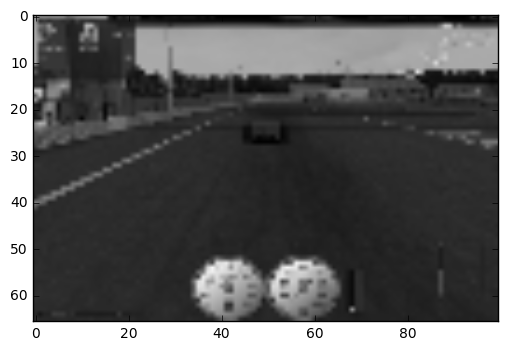

In [13]:
# plt.imshow(image_dict[1]['raw'])

In [14]:
tmp = pd.DataFrame.from_dict(image_dict)

In [15]:
tmp.head()

,index,raw
0,1479699964422.png,"[[[155, 155, 155], [145, 145, 145], [144, 144,..."
1,1479699964448.png,"[[[155, 155, 155], [145, 145, 145], [144, 144,..."
2,1479699964460.png,"[[[155, 155, 155], [145, 145, 145], [144, 144,..."
3,1479699964472.png,"[[[155, 155, 155], [145, 145, 145], [144, 144,..."
4,1479699964505.png,"[[[155, 155, 155], [154, 154, 154], [153, 153,..."


In [16]:
tmp2 = images_validation.merge(tmp)

In [17]:
tmp2.head()

,index,speed,raw
0,1479699965366.png,0.000050,"[[[155, 155, 155], [154, 154, 154], [153, 153,..."
1,1479699965394.png,0.000050,"[[[155, 155, 155], [154, 154, 154], [153, 153,..."
2,1479699965420.png,0.000535,"[[[155, 155, 155], [154, 154, 154], [153, 153,..."
3,1479699965445.png,0.000739,"[[[155, 155, 155], [154, 154, 154], [153, 153,..."
4,1479699965471.png,0.142834,"[[[155, 155, 155], [154, 154, 154], [153, 153,..."


In [18]:
x = tmp2['raw']
Y = tmp2['speed'].values

In [19]:
# x = np.array([x])[0].shape

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.33)

In [25]:
X_train = np.array([X_train])[0]
X_test = np.array([X_test])[0]
X_train.shape

(3130, 66, 100, 3)

In [26]:
X_train = X_train/ 255.0
X_test = X_test/ 255.0

In [28]:
# X_train[1]

In [33]:
# X_train1[1]

In [35]:
def baseline_model():

    model = Sequential()
    model.add(Convolution2D(24, 3, 3, border_mode='valid', input_shape=(66, 100, 3), activation='relu'))
    model.add(Convolution2D(36, 5, 5, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
    model.add(Convolution2D(48, 5, 5, activation='relu', border_mode='same'))
    model.add(Convolution2D(64, 5, 5, activation='relu', border_mode='same'))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(Flatten())
    model.add(Dense(400, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(output_dim=1,activation='relu'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    print(model.summary())
    return model

In [ ]:
filepath = "weights/weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
model = baseline_model()
model.fit(X_train, y_train, nb_epoch = 20, batch_size=100, validation_split=0.2, callbacks=callbacks_list)
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_6 (Convolution2D)  (None, 64, 98, 24)    672         convolution2d_input_2[0][0]      
____________________________________________________________________________________________________
convolution2d_7 (Convolution2D)  (None, 64, 98, 36)    21636       convolution2d_6[0][0]            
____________________________________________________________________________________________________
convolution2d_8 (Convolution2D)  (None, 64, 98, 48)    43248       convolution2d_7[0][0]            
____________________________________________________________________________________________________
convolution2d_9 (Convolution2D)  (None, 64, 98, 64)    76864       convolution2d_8[0][0]            
___________________________________________________________________________________________